In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # 복잡한 형태의 데이터 셋
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [18]:
n_pts = 500
X, Y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2) # 시드값 = 123과 노이즈 추가, 안의 원이 바깥의 원의 20% 사이즈; 안의 점들은 1 바깥의 점들은 0

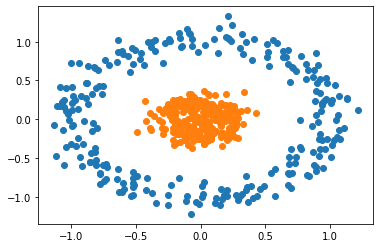

In [19]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [20]:
model = Sequential()
model.add(Dense(4, input_shape=(2, ), activation='sigmoid')) # Added a hidden layer with 4 nodes. the input layer consists of 2 nodes.
model.add(Dense(1, activation='sigmoid')) # the final node is only 1 node
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
h = model.fit(x=X, y=Y, verbose=1, batch_size = 20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7541 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.5220
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5160
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4960
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5120
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5500
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.3960
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5360
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.6320
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4260
Epoch 11/

Text(0.5, 1.0, 'accuracy')

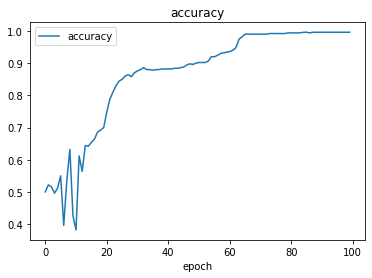

In [22]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

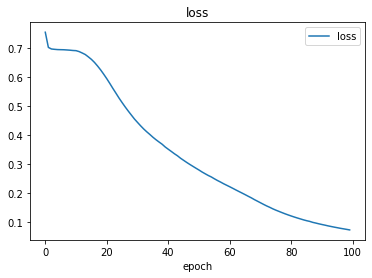

In [23]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [9]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25) #  grid making.
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span) # xx 는 (1, 50) 인 x를 (50, 50) 행렬로 만듬. yy도 똑같음
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_] # xx와 yy를 열로 바꾼 후 concatenate하는 함수.
    pred_func = model.predict(grid) # grid에 있는 모든 점들에 대한 prediction 실행.
    z = pred_func.reshape(xx.shape) # 결과의 모양을 바꿔줌줌
    plt.contourf(xx, yy, z) # 그림으로 나타냄

79/79 [==============================] - 0s 1ms/step


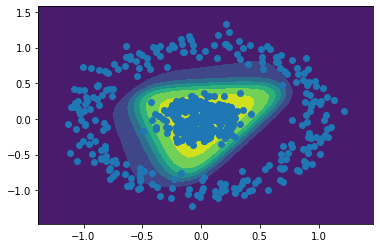

In [24]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 33ms/step
Prediction is:  [[0.14584054]]


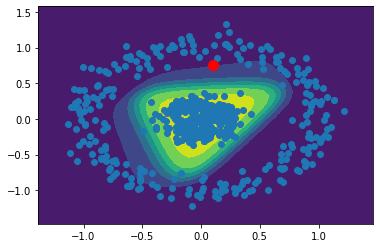

In [26]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0.75
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)